# NonNegative ALS with just Stars

https://spark.apache.org/docs/latest/ml-collaborative-filtering.html

In [195]:
import pandas as pd
import numpy as np

import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS

# Setup a SparkSession
spark = SparkSession.builder.getOrCreate()

In [196]:
# import src_2.evaluate as evaluate

# # Convert a Pandas DF to a Spark DF
# spark_df = spark.createDataFrame(pandas_df) 

# # Convert a Spark DF to a Pandas DF
# pandas_df = spark_df.toPandas()

In [197]:
train_starred = pd.read_pickle('data/pickled/train_starred.pkl')
test_starred = pd.read_pickle('data/pickled/test_starred.pkl')

In [198]:
spark_train_stars_df = spark.createDataFrame(train_starred)
spark_test_stars_df = spark.createDataFrame(test_starred)

#### check spark dataframes

In [4]:
spark_train_stars_df.show()

+--------+-------+-------------------+---------------+----+--------------------+--------+-------+
| repo_id|user_id|         created_at|          login|type|                 url|language|starred|
+--------+-------+-------------------+---------------+----+--------------------+--------+-------+
|   12031| 889397|1202439272000000000|       cdcarter| USR|https://api.githu...|    Ruby|      1|
|52574448| 889397|1202442872000000000|       cdcarter| USR|https://api.githu...|      \N|      1|
|   12031|  17898|1203008090000000000|        gnufied| USR|https://api.githu...|    Ruby|      1|
|   12031|  25789|1203568157000000000|          Sutto| USR|https://api.githu...|    Ruby|      1|
|   12031|  10942|1203910346000000000|       tarcieri| USR|https://api.githu...|    Ruby|      1|
|   12031|  35126|1204050466000000000|         cypher| USR|https://api.githu...|    Ruby|      1|
|40916741| 401456|1204169012000000000|           dsrw| USR|https://api.githu...|   Shell|      1|
|   12031|  60568|12

In [5]:
spark_test_stars_df.show()

+--------+--------+-------------------+-----------------+----+--------------------+----------+-------+
| repo_id| user_id|         created_at|            login|type|                 url|  language|starred|
+--------+--------+-------------------+-----------------+----+--------------------+----------+-------+
|55567488| 6694284|1485492399000000000|          CaiJiJi| USR|https://api.githu...|    Python|      1|
|    1282|13665131|1485492672000000000|         tarvos21| USR|https://api.githu...|    Python|      1|
|   16356| 6806774|1485492818000000000|       acro5piano| USR|https://api.githu...|       PHP|      1|
|12651428|   11997|1485492868000000000|           alias1| USR|https://api.githu...|    Python|      1|
|  394885| 9279104|1485493232000000000|        nilsdeppe| USR|https://api.githu...|    Python|      1|
|29629404| 2060726|1485493578000000000|           Patola| USR|https://api.githu...|         C|      1|
|   38701|12092442|1485493937000000000|         buhuipao| USR|https://api

#### create ALS recommender model

In [199]:
als_model = ALS(
    itemCol='repo_id',
    userCol='user_id',
    ratingCol='starred',
    implicitPrefs=True,
    nonnegative=True,    
    regParam=0.1,
    rank=10
    ) 

In [200]:
recommender = als_model.fit(spark_train_stars_df)
predictions = recommender.transform(spark_test_stars_df)

In [203]:
pred_df = predictions.toPandas()
pred_df.sort_values('prediction', ascending=False)

,repo_id,user_id,created_at,login,type,url,language,starred,prediction
138835,28557277,3011143,1496672996000000000,a5a,USR,https://api.github.com/repos/tensorflow/tensor...,C++,1,1.102072
137380,28557277,63262,1485843715000000000,jiessie,USR,https://api.github.com/repos/tensorflow/tensor...,C++,1,0.989328
162723,14098,13164165,1495363594000000000,nycatelos,USR,https://api.github.com/repos/radare/radare2,C,1,0.973631
120918,9664377,1733408,1497235274000000000,MaGuowei,USR,https://api.github.com/repos/tornadoweb/tornado,Python,1,0.970888
138107,28557277,4262703,1486886331000000000,jtlowery,USR,https://api.github.com/repos/tensorflow/tensor...,C++,1,0.957618
38342,424503,6075868,1489650656000000000,tzpBingo,USR,https://api.github.com/repos/soimort/you-get,Python,1,0.941444
11631,28686845,2531148,1492411569000000000,chinakook,USR,https://api.github.com/repos/aymericdamien/Ten...,Jupyter Notebook,1,0.923364
162705,14098,3362790,1490736627000000000,hslatman,USR,https://api.github.com/repos/radare/radare2,C,1,0.921127
138601,28557277,8681879,1488822736000000000,htadg,USR,https://api.github.com/repos/tensorflow/tensor...,C++,1,0.910691
128267,10170583,9255737,1487596797000000000,xeoneux,USR,https://api.github.com/repos/google/cadvisor,Go,1,0.907960


#### See what predictions come from all users-repos

The 'prediction' Spark ALS returns for user-repo combos (using implicit ratings) is the level of confidence the model has that the user would interact the repo.

So to make repo recommendations for a user, I need to run .transform() on a spark dataframe of that user against every repo I have.

# NonNegative ALS with Stars & Forks (implicit weighted actions)

https://spark.apache.org/docs/latest/ml-collaborative-filtering.html

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
# from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

# Setup a SparkSession
spark = SparkSession.builder.getOrCreate()

In [92]:
forks_and_stars = pd.read_pickle('data/pickled/forks_and_stars.pkl')
forks_and_stars.columns

Index([u'user_id', u'repo_id', u'forked', u'created_at', u'starred',
       u'interest_rank'],
      dtype='object')

#### since I didn't pickle train and test data for this run using both Star and Forks, create my timestamp ordered train-test split

In [93]:
def ordered_train_test_split(df, order_by, test_size=0.33):
    '''
    Takes a pandas dataframe and returns a train and test dataset ordered by the 
    column name passed to order_by and sliced up to the test_size
    INPUT:
    df: pandas df
    order_by: list or str of column names
    test_size: float percentage of df to use as test set
    OUTPUT:
    train: pandas dataframe
    test: pandas dataframe
    '''
    upto = int(df.shape[0] * (1 - test_size))
    df = df.sort_values(by=order_by, axis=0)
    train = df.iloc[:upto,:]
    test = df.iloc[upto:,:]
    return train, test

In [94]:
train_forks_stars, test_forks_stars = ordered_train_test_split(
    forks_and_stars, order_by=['created_at'], test_size=0.33)

In [95]:
print train_forks_stars.shape
print test_forks_stars.shape

(681076, 6)
(335456, 6)


#### create spark dataframes for train/test data

In [96]:
sp_train_forks_stars = spark.createDataFrame(train_forks_stars)
sp_test_forks_stars = spark.createDataFrame(test_forks_stars)

In [97]:
model = ALS(
    itemCol='repo_id',
    userCol='user_id',
    ratingCol='interest_rank',
    implicitPrefs=True,
    nonnegative=True,    
    maxIter=10, 
    alpha=0.01
    ) 

In [98]:
recommender = model.fit(sp_train_forks_stars)
predictions = recommender.transform(sp_test_forks_stars)

In [99]:
pred_df = predictions.toPandas()

In [100]:
pred_df.sort_values(['user_id','prediction'], ascending=False)

,user_id,repo_id,forked,created_at,starred,interest_rank,prediction
17451,36791462,68425726,2.0,1498863052000000000,0.0,2.0,NaN
3042,36791293,20711751,2.0,1498861756000000000,1.0,3.0,NaN
93307,36791293,20711251,0.0,1498861751000000000,1.0,1.0,NaN
24524,36791076,38393576,2.0,1498860785000000000,0.0,2.0,NaN
141628,36790822,24958152,2.0,1498858442000000000,0.0,2.0,NaN
324068,36790741,63547354,2.0,1498860145000000000,0.0,2.0,NaN
320981,36790642,51568068,2.0,1498857388000000000,0.0,2.0,NaN
296748,36790336,13057459,2.0,1498855585000000000,0.0,2.0,NaN
255195,36789893,30334789,2.0,1498853132000000000,0.0,2.0,NaN
183068,36789460,27683242,2.0,1498850815000000000,0.0,2.0,NaN


# NonNegative ALS with Stars & Owned Repos (implicit weighted actions)

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
# from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

# Setup a SparkSession
spark = SparkSession.builder.getOrCreate()

In [205]:
own_and_star = pd.read_pickle('data/pickled/own_and_star.pkl')
own_and_star.columns

Index([u'repo_id', u'user_id', u'forked_from_repo_id', u'owned', u'created_at',
       u'starred', u'interest_rank'],
      dtype='object')

#### since I didn't pickle train and test data for this run using both Star and Forks, create my timestamp ordered train-test split

In [206]:
def ordered_train_test_split(df, order_by, test_size=0.33):
    '''
    Takes a pandas dataframe and returns a train and test dataset ordered by the 
    column name passed to order_by and sliced up to the test_size
    INPUT:
    df: pandas df
    order_by: list or str of column names
    test_size: float percentage of df to use as test set
    OUTPUT:
    train: pandas dataframe
    test: pandas dataframe
    '''
    upto = int(df.shape[0] * (1 - test_size))
    df = df.sort_values(by=order_by, axis=0)
    train = df.iloc[:upto,:]
    test = df.iloc[upto:,:]
    return train, test

In [207]:
train_owns_stars, test_owns_stars = ordered_train_test_split(
    own_and_star, order_by=['created_at'], test_size=0.33)

In [208]:
print train_owns_stars.shape
print test_owns_stars.shape

(743788, 7)
(366344, 7)


#### create spark dataframes for train/test data

In [211]:
sp_train_owns_stars = spark.createDataFrame(train_owns_stars)
sp_test_owns_stars = spark.createDataFrame(test_owns_stars)

In [217]:
model = ALS(
    itemCol='repo_id',
    userCol='user_id',
    ratingCol='starred',
    implicitPrefs=True,
    nonnegative=True,    
    regParam=0.1,
    rank=10,
    ) 

In [218]:
recommender = model.fit(sp_train_owns_stars)
rawPredictions = recommender.transform(sp_test_owns_stars)

In [219]:
pred_df = rawPredictions.toPandas()

In [220]:
null_predictions = sum(pred_df['prediction'].isnull())


In [221]:
pred_df.sort_values(['prediction'], ascending=False).head(10)

,repo_id,user_id,forked_from_repo_id,owned,created_at,starred,interest_rank,prediction
282462,28557277,7505241,0,0.0,1480606331000000000,1.0,1.0,1.194906
256745,390,298983,0,0.0,1492947411000000000,1.0,1.0,1.097282
281864,28557277,2825561,0,0.0,1487201684000000000,1.0,1.0,1.084114
280951,28557277,1167967,0,0.0,1487261828000000000,1.0,1.0,1.055447
282108,28557277,6458,0,0.0,1491574650000000000,1.0,1.0,1.049578
247445,9664377,1733408,0,0.0,1497235274000000000,1.0,1.0,1.033785
281974,28557277,599582,0,0.0,1496446669000000000,1.0,1.0,1.027036
280187,28557277,1169947,0,0.0,1484784289000000000,1.0,1.0,0.999833
233437,2258091,118635,0,0.0,1484742495000000000,1.0,1.0,0.999653
256861,390,106260,0,0.0,1495012124000000000,1.0,1.0,0.963876


In [227]:
non_null = pred_df.loc[pred_df['prediction'].isnull() == False]
non_null = non_null['prediction']


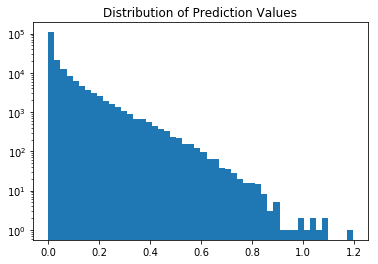

In [229]:
plt.hist(non_null, bins=50)
plt.title("Distribution of Prediction Values")
plt.yscale('log');

In [230]:
# Predictions where repo-user has just a OWNS relationship
(pred_df.loc[(pred_df.interest_rank == 4) & (~pred_df.prediction.isnull())]).sort_values(
    'prediction', ascending=False)

,repo_id,user_id,forked_from_repo_id,owned,created_at,starred,interest_rank,prediction
245113,52878664,2216159,0,4.0,1481755233000000000,0.0,4.0,0.016881
123447,53531959,599582,0,4.0,1482796812000000000,0.0,4.0,0.001790
28325,56322797,10433,0,4.0,1486246603000000000,0.0,4.0,0.001627
182690,56341200,2606940,0,4.0,1486310145000000000,0.0,4.0,0.000544
285944,53389749,9652,0,4.0,1482540899000000000,0.0,4.0,0.000397
21771,56725833,10269343,0,4.0,1486185254000000000,0.0,4.0,0.000061
75564,52688610,596995,0,4.0,1481277537000000000,0.0,4.0,0.000050
64988,52668800,265517,0,4.0,1481575228000000000,0.0,4.0,0.000041
114402,56507651,7830654,0,4.0,1486218712000000000,0.0,4.0,0.000008
31448,56531417,693322,0,4.0,1486351589000000000,0.0,4.0,0.000000


In [131]:
(pred_df.loc[pred_df.user_id == 9652]).sort_values('prediction', ascending=False)

,repo_id,user_id,forked_from_repo_id,owned,created_at,starred,interest_rank,prediction
285944,53389749,9652,0,4.0,1482540899000000000,0.0,4.0,0.844856


In [231]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366344 entries, 0 to 366343
Data columns (total 8 columns):
repo_id                366344 non-null int64
user_id                366344 non-null int64
forked_from_repo_id    366344 non-null int64
owned                  366344 non-null float64
created_at             366344 non-null int64
starred                366344 non-null float64
interest_rank          366344 non-null float64
prediction             181703 non-null float64
dtypes: float64(4), int64(4)
memory usage: 22.4 MB


#### RMSE won't really work for implicit data since there are no target values you're trying to hit, just a strength the model believes the user would have an interest in the repo

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [234]:
rawPredictions = spark.createDataFrame(pred_df.dropna(axis=0))

In [235]:
predictions = rawPredictions\
    .withColumn("interest_rank", rawPredictions.interest_rank.cast("double"))\
    .withColumn("prediction", rawPredictions.prediction.cast("double"))
evaluator =\
    RegressionEvaluator(metricName="rmse", labelCol="interest_rank", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)

print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.980168569177


### Recommendations for All Users

In [236]:
userRecs = model.recommendForAllUsers(10)

model.recommendForAllUsers

AttributeError: 'ALS' object has no attribute 'recommendForAllUsers'